In [184]:
import pandas as pd 
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


In [185]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Logistic Regression\datasets\churn-bigml-20.csv')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [186]:
midwest = ['KS', 'ND', 'WI', 'IN', 'MO', 'OH', 'IL', 'MN', 'NE', 'SD', 'IA', 'MI']
west = ['AZ', 'WA', 'NM', 'ID', 'TX', 'OR', 'MT', 'UT', 'WY', 'CA', 'AK', 'HI', 'CO', 'NV']
northeast = ['NJ', 'NY', 'CT', 'NH', 'MA', 'ME', 'RI', 'VT', 'PA']
south = ['WV', 'MS', 'KY', 'LA', 'AL', 'NC', 'TN', 'VA', 'DE', 'MD', 'OK', 'FL', 'DC', 'AR', 'GA', 'SC']

region_map = {state: 'Midwest' for state in midwest}
region_map.update({state: 'West' for state in west})
region_map.update({state: 'Northeast' for state in northeast})
region_map.update({state: 'South' for state in south})

df['Region'] = df['State'].map(region_map)

In [187]:

df.drop(['State', 'Total day charge', 'Total eve charge', 'Total night charge', 
    'Total intl charge', 'Area code'], axis=1, inplace=True)

In [188]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,Region
0,117,No,No,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False,South
1,65,No,No,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True,Midwest
2,161,No,No,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True,Northeast
3,111,No,No,0,110.4,103,137.3,102,189.6,105,7.7,6,2,False,South
4,49,No,No,0,119.3,117,215.1,109,178.7,90,11.1,1,1,False,West


In [189]:
df.isna().sum()

Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total eve minutes         0
Total eve calls           0
Total night minutes       0
Total night calls         0
Total intl minutes        0
Total intl calls          0
Customer service calls    0
Churn                     0
Region                    0
dtype: int64

In [190]:
df.duplicated().sum()

np.int64(0)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   International plan      667 non-null    object 
 2   Voice mail plan         667 non-null    object 
 3   Number vmail messages   667 non-null    int64  
 4   Total day minutes       667 non-null    float64
 5   Total day calls         667 non-null    int64  
 6   Total eve minutes       667 non-null    float64
 7   Total eve calls         667 non-null    int64  
 8   Total night minutes     667 non-null    float64
 9   Total night calls       667 non-null    int64  
 10  Total intl minutes      667 non-null    float64
 11  Total intl calls        667 non-null    int64  
 12  Customer service calls  667 non-null    int64  
 13  Churn                   667 non-null    bool   
 14  Region                  667 non-null    ob

Data Splitting

In [192]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

Exploratory Data Analysis

Numerical Variables Distribution

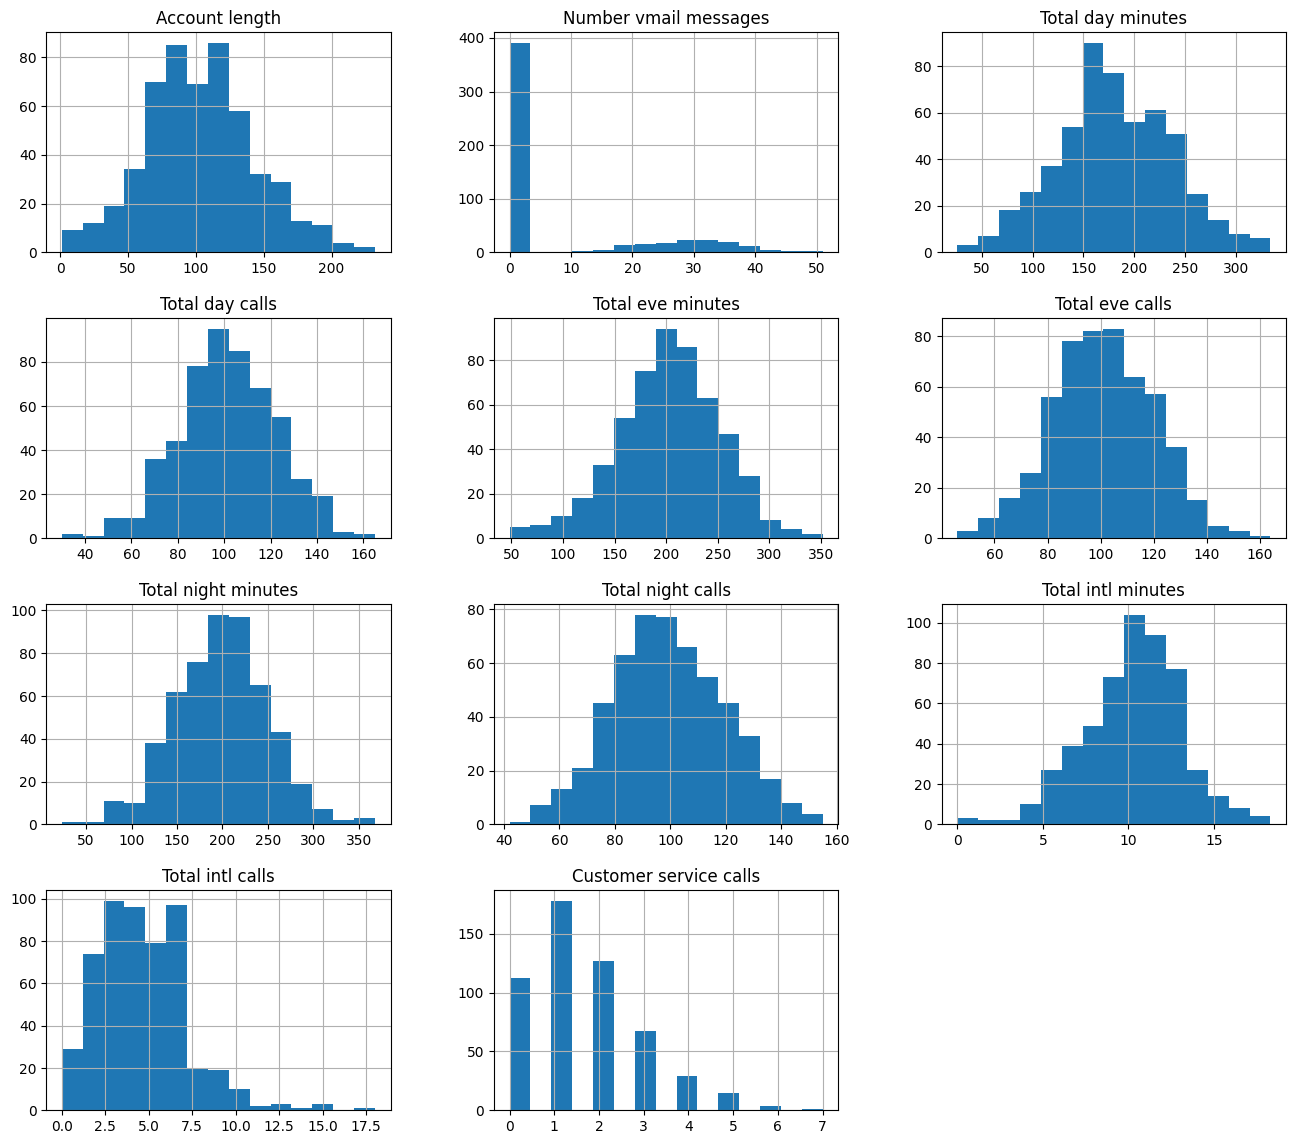

In [193]:
df_num = train._get_numeric_data()
df_num.hist(bins=15, figsize=(16,14))
plt.show()

Categorical Variables Distribution

In [194]:
df_cat = train.select_dtypes(include=['object'])
df_cat.columns

Index(['International plan', 'Voice mail plan', 'Region'], dtype='object')

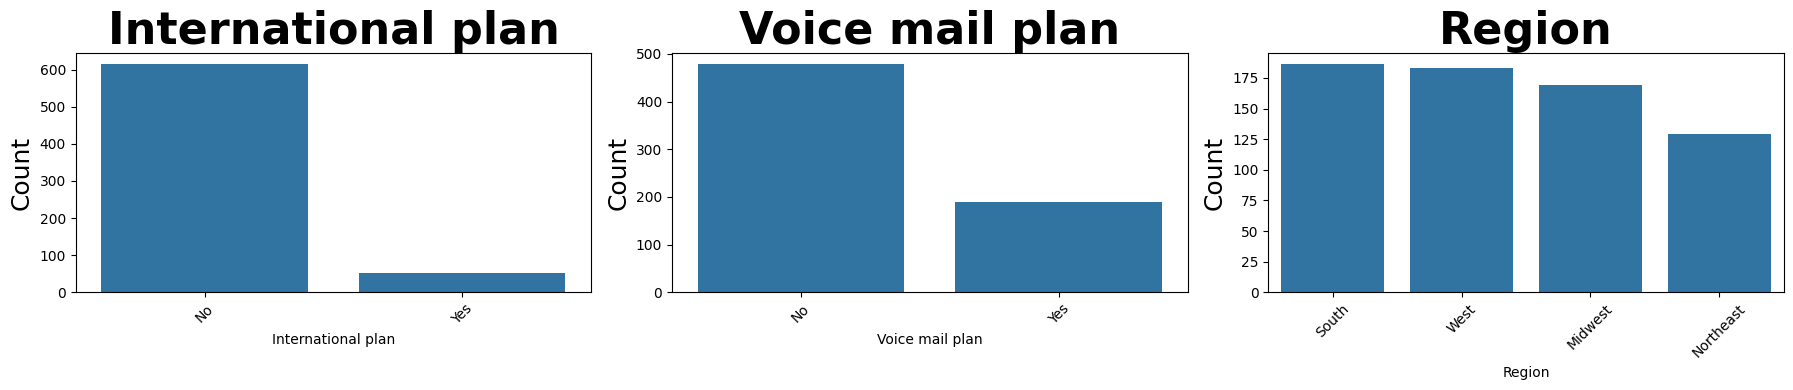

In [195]:
df_cat =['International plan', 'Voice mail plan', 'Region']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(6*n_cols, 4*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

In [196]:
ecd = LabelEncoder()
train['Churn'] = ecd.fit_transform(train['Churn'])

Feature Correlation

In [197]:
train_num = train._get_numeric_data()
train_corr = train.corr(numeric_only=True)['Churn'].drop('Churn')
train_corr

Account length           -0.003592
Number vmail messages    -0.111139
Total day minutes         0.232065
Total day calls          -0.004356
Total eve minutes         0.161494
Total eve calls           0.052294
Total night minutes       0.039027
Total night calls         0.008029
Total intl minutes        0.027204
Total intl calls          0.005429
Customer service calls    0.253626
Name: Churn, dtype: float64

In [198]:
train_num.corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)

Customer service calls    0.253626
Total day minutes         0.232065
Total eve minutes         0.161494
Number vmail messages     0.111139
Total eve calls           0.052294
Total night minutes       0.039027
Total intl minutes        0.027204
Total night calls         0.008029
Total intl calls          0.005429
Total day calls           0.004356
Account length            0.003592
Name: Churn, dtype: float64

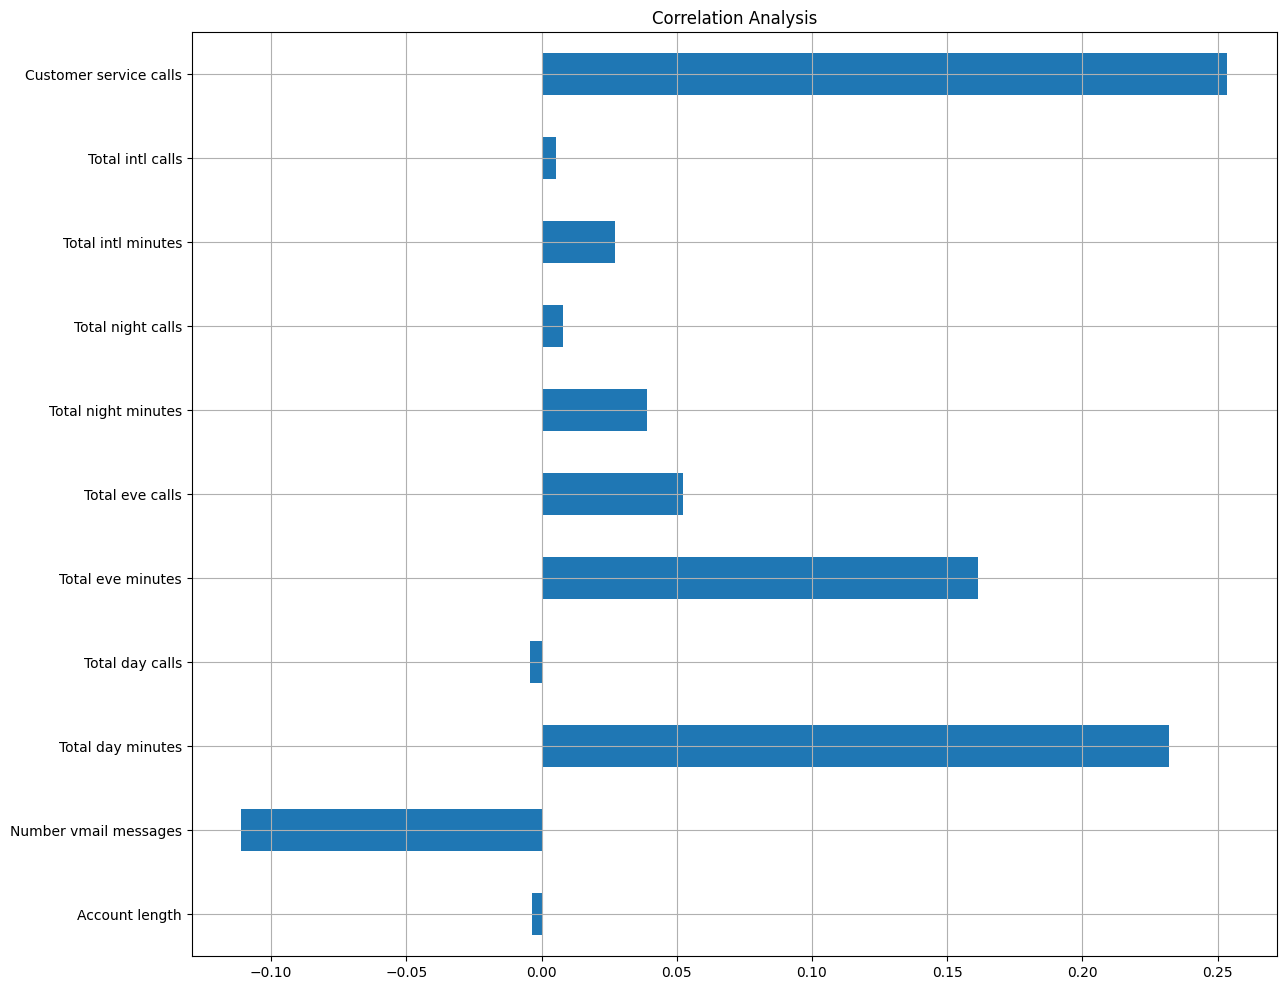

In [199]:
plt.figure(figsize=(14,12))
train_corr.plot(kind='barh', grid=True)
plt.title('Correlation Analysis')
plt.show()

In [200]:
train_corr = train_num.columns
train_corr

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

In [201]:
train_corr = train[['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn']]

train_corr = train_corr.corr()

Feature Correlation Heatmap

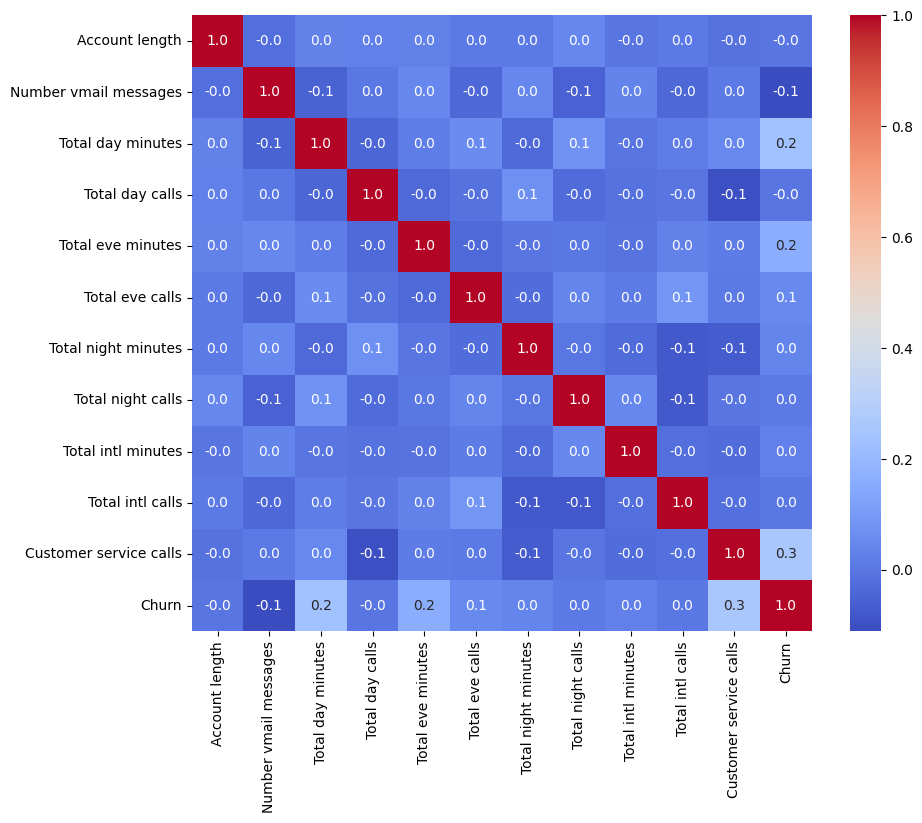

In [202]:
plt.figure(figsize=(10,8))
sns.heatmap(data=train_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Preprocessing

In [203]:
categorical_columns = ['International plan', 'Voice mail plan', 'Region']

numerical_columns = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls']

In [204]:
preprocessor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), (categorical_columns)),
    ('scd', StandardScaler(), (numerical_columns))
],
remainder = 'passthrough'
)
preprocessor.set_output(transform='pandas')

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe', ...), ('scd', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``.

In [205]:
train_clean = preprocessor.fit_transform(train)
train_clean.head()

,ohe__International plan_No,ohe__International plan_Yes,ohe__Voice mail plan_No,ohe__Voice mail plan_Yes,ohe__Region_Midwest,ohe__Region_Northeast,ohe__Region_South,ohe__Region_West,scd__Account length,scd__Number vmail messages,scd__Total day minutes,scd__Total day calls,scd__Total eve minutes,scd__Total eve calls,scd__Total night minutes,scd__Total night calls,scd__Total intl minutes,scd__Total intl calls,scd__Customer service calls,remainder__Churn
551,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.837756,1.983109,-0.104002,-0.629192,-0.254049,-1.902520,-1.194073,-0.276436,0.086097,-0.633742,0.296605,0
46,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.069707,1.763891,-0.273625,1.187956,0.279870,-0.420542,-0.512699,-0.678318,1.349113,1.381678,1.795091,0
618,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.020594,-0.574437,1.770782,1.235775,-0.467616,-1.161531,-0.958365,-1.130436,1.735035,0.575510,2.544334,0
445,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.438050,-0.574437,-0.841417,0.518480,-0.151294,0.161663,-0.780099,1.984154,0.086097,-1.036826,0.296605,0
305,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.585388,-0.574437,1.045866,0.279382,-1.485085,1.061435,1.008508,0.527330,0.366767,0.172426,-0.452638,0


In [208]:
train_clean.to_csv('Churn train set.csv', index=False)
test.to_csv('Churn test set.csv', index=False)
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']